<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-IcaData-object" data-toc-modified-id="Load-IcaData-object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load IcaData object</a></span></li><li><span><a href="#Annotate-iModulons" data-toc-modified-id="Annotate-iModulons-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Annotate iModulons</a></span><ul class="toc-item"><li><span><a href="#Plot-Gene-Weights" data-toc-modified-id="Plot-Gene-Weights-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot Gene Weights</a></span></li><li><span><a href="#Compute-Regulator-Enrichment" data-toc-modified-id="Compute-Regulator-Enrichment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compute Regulator Enrichment</a></span></li><li><span><a href="#Plot-Regulator-Histogram" data-toc-modified-id="Plot-Regulator-Histogram-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot Regulator Histogram</a></span></li><li><span><a href="#Show-Genes" data-toc-modified-id="Show-Genes-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Show Genes</a></span></li><li><span><a href="#Plot-iModulon-Activities" data-toc-modified-id="Plot-iModulon-Activities-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot iModulon Activities</a></span></li><li><span><a href="#Add-iModulon-Table-to-IcaData" data-toc-modified-id="Add-iModulon-Table-to-IcaData-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Add iModulon Table to IcaData</a></span><ul class="toc-item"><li><span><a href="#Add-Explained-Variance" data-toc-modified-id="Add-Explained-Variance-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Add Explained Variance</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from pymodulon.core import IcaData
from pymodulon.visualization import *
from pymodulon.io import load_json_model, save_to_json
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 200)

# Load IcaData object

In [3]:
ica_data = load_json_model('../data/precise2/precise2.json.gz')

# Annotate iModulons

In [4]:
ims_to_annotate = ica_data.imodulon_table[ica_data.imodulon_table['note'].notna()]
ims_to_annotate

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,note,category
membrane?,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H-NS?,NaN
nquinone?,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,odd; nquinone spike,NaN
Fe-Related?,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fe-related? Is this RyhB?,NaN
Uncharacterized-1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN
Uncharacterized-2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stress/membrane/defense?,NaN
Uncharacterized-3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lots of y-genes,NaN
Uncharacterized-4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,maybe media-related,NaN
Uncharacterized-5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,quite unclear,NaN
Uncharacterized-7,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no clue,NaN
RpoS+RpoN+NtrC,Sigma38+Sigma54+ntrC,4.140000e-28,2.600000e-21,1.0,0.578947,0.733333,11.0,11.0,19.0,3.0,NaN,energy/arg catabolism maybe?,NaN


In [5]:
#iM_to_annotate = list(ims_to_annotate.index)[35]
iM_to_annotate = 'NsrR'
iM_to_annotate

'NsrR'

## Plot Gene Weights

<AxesSubplot:xlabel='Gene Start', ylabel='NsrR Gene Weight'>

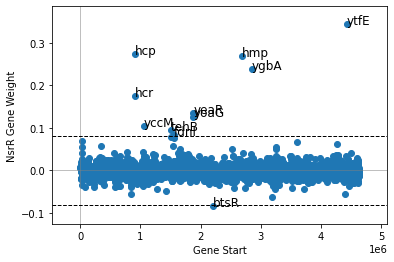

In [6]:
plot_gene_weights(ica_data,iM_to_annotate, adjust_labels=False)

## Compute Regulator Enrichment

In [13]:
reg_enrichment = ica_data.compute_trn_enrichment(iM_to_annotate, max_regs=2, force=True)
reg_enrichment

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs


## Plot Regulator Histogram

<AxesSubplot:xlabel='194 Gene Weight', ylabel='Number of Genes'>

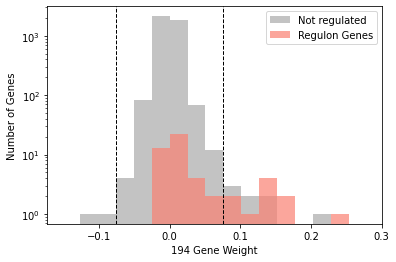

In [651]:
plot_regulon_histogram(ica_data, iM_to_annotate, reg_enrichment.loc[0, 'regulator'])

## Show Genes

In [165]:
imod_genes = ica_data.view_imodulon(iM_to_annotate)
imod_genes['length'] = imod_genes['end'] - imod_genes['start']
imod_genes.sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator,length
b1748,0.189480,astC,NaN,1830762,1831982,-,succinylornithine transaminase,Amino acid transport and metabolism,P77581,"Sigma38,Sigma54,Sigma70,arcA,argR,lrp,ntrC",1220
b1747,0.185854,astA,NaN,1829731,1830765,-,arginine N-succinyltransferase,Amino acid transport and metabolism,P0AE37,"Sigma38,Sigma54,Sigma70,arcA,argR,lrp,ntrC",1034
b1488,0.174844,ddpX,NaN,1562495,1563076,-,D-alanyl-D-alanine dipeptidase,Cell wall/membrane/envelope biogenesis,P77790,"Sigma38,Sigma54,arcA,nac,ntrC",581
b1746,0.158633,astD,NaN,1828256,1829734,-,aldehyde dehydrogenase,Energy production and conversion,P76217,"Sigma38,Sigma54,Sigma70,arcA,argR,lrp,ntrC",1478
b1745,0.147039,astB,NaN,1826916,1828259,-,N-succinylarginine dihydrolase,Amino acid transport and metabolism,P76216,"Sigma38,Sigma54,Sigma70,arcA,argR,lrp,ntrC",1343
b1487,0.142929,ddpA,NaN,1560931,1562481,-,putative D%2CD-dipeptide ABC transporter perip...,Amino acid transport and metabolism,P76128,"Sigma38,Sigma54,arcA,nac,ntrC",1550
b1486,0.142020,ddpB,NaN,1559907,1560929,-,putative D%2CD-dipeptide ABC transporter membr...,Amino acid transport and metabolism,P77308,"Sigma38,Sigma54,arcA,nac,ntrC",1022
b4565,0.130080,sgcB,NaN,4530255,4530533,-,putative PTS enzyme IIB component SgcB,Carbohydrate transport and metabolism,P58035,NaN,278
b1744,0.129351,astE,NaN,1825955,1826923,-,succinylglutamate desuccinylase,Amino acid transport and metabolism,P76215,"Sigma38,Sigma54,Sigma70,arcA,argR,lrp,ntrC",968
b1485,0.106425,ddpC,NaN,1559014,1559910,-,putative D%2CD-dipeptide ABC transporter membr...,Amino acid transport and metabolism,P77463,"Sigma38,Sigma54,arcA,nac,ntrC",896


## Plot iModulon Activities

<AxesSubplot:ylabel='no clue? iModulon\nActivity'>

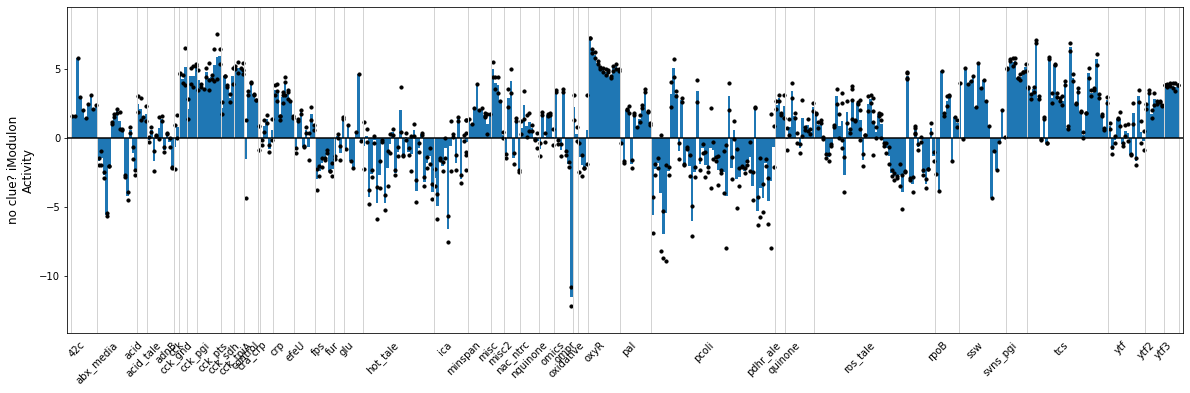

In [158]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, ax=ax)

<AxesSubplot:ylabel='polymix? iModulon\nActivity'>

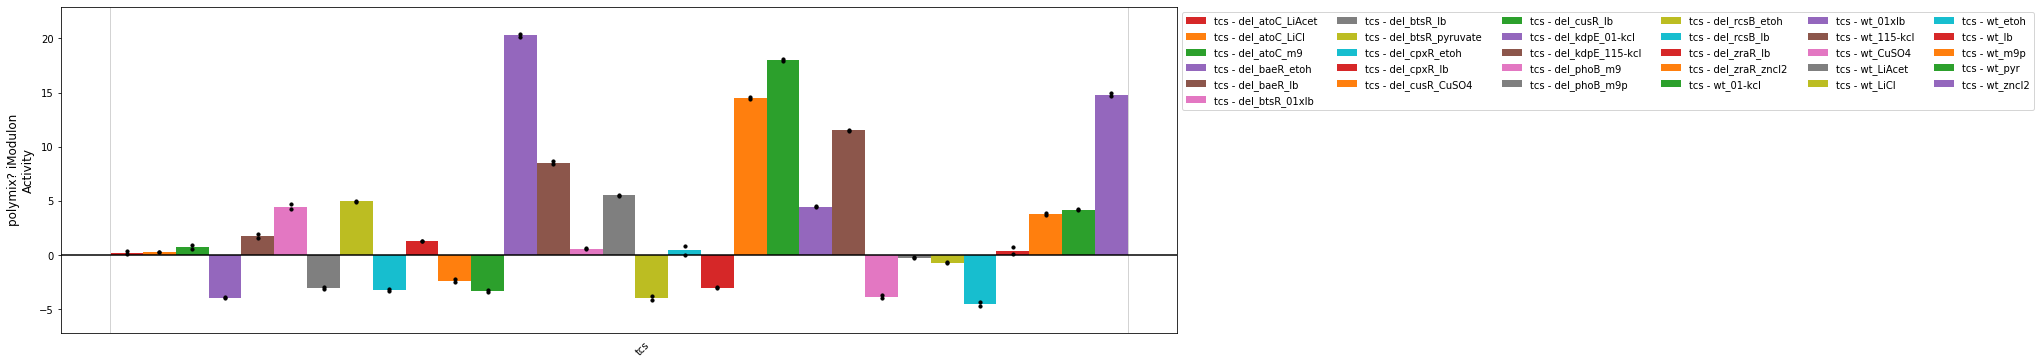

In [153]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, projects='tcs', ax=ax)

In [176]:
pd.set_option('display.max_rows', 200) 

In [185]:
ica_data.sample_table.columns

Index(['sample_id', 'study', 'project', 'condition', 'rep_id', 'contact',
       'creator', 'run_date', 'Strain Description', 'Strain', 'Base Media',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH',
       'Antibiotic for selection', 'Culture Type', 'Growth Rate (1/hr)',
       'Evolved Sample', 'Isolate Type', 'Sequencing Machine',
       'Additional Details', 'Biological Replicates', 'R1', 'R2', 'BAM',
       'alignment', 'DOI', 'GEO', 'Published', 'SRX', 'Run', 'Notes',
       'LibraryLayout', 'Platform', 'passed_fastqc', 'passed_pct_reads_mapped',
       'passed_reads_mapped_to_CDS', 'passed_global_correlation', 'full_name',
       'passed_similar_replicates', 'passed_number_replicates'],
      dtype='object')

In [573]:
ica_data.sample_table[ica_data.sample_table['project'].isin(['misc2'])].sort_values(by='condition')[[
    'sample_id', 'Strain', 'Base Media',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH'
]]

,sample_id,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH
ecoli_00285,misc2__arg_cytd__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,cytidine (1mM) + arginine (5mM),37,7.0
ecoli_00286,misc2__arg_cytd__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,cytidine (1mM) + arginine (5mM),37,7.0
ecoli_00281,misc2__dbcn_glc__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,dibucaine,37,7.0
ecoli_00282,misc2__dbcn_glc__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,dibucaine,37,7.0
ecoli_00832,misc2__dellon_glc__1,MG1655,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00833,misc2__dellon_glc__2,MG1655,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00287,misc2__delyheO_pyr__1,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00288,misc2__delyheO_pyr__2,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00279,misc2__salc_glc__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,salicylate,37,7.0
ecoli_00280,misc2__salc_glc__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,salicylate,37,7.0


## Add iModulon Table to IcaData

In [14]:
imod_table = pd.read_csv('../data/precise2/imodulon_table.csv', index_col=0)
imod_table.head()

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,note,category
e14-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Genomic
SG_yzfA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,Other
SG_ytiD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,Other
membrane?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H-NS?,Biological
CysB-1,cysB,3.770000e-28,1.940000e-23,0.5,0.516129,0.507937,16.0,32.0,31.0,1.0,NaN,NaN,Regulatory


In [15]:
ica_data.rename_imodulons(dict(zip(ica_data.imodulon_names, list(imod_table.index))))

In [16]:
ica_data.imodulon_table = imod_table

In [171]:
save_to_json(ica_data, '../data/precise2/precise2.json', compress=True)